# Υπολογιστική νοημοσύνη 
## Επίλυση προβλήματος ταξινόμησης με χρήση Multi-layer Perceptron δικτύου
#### Κωτούλας Εμμανουήλ 9697

Σε αυτήν την εργασία θα χρησιμοποιηθεί το MNIST dataset που περιέχει εικόνες από χειρόγραφους αριθμούς από το 0 έως το 9 με σκοπό την ταξινόμηση τους

In [1]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.initializers import RandomNormal
from tensorflow.keras import regularizers
import time

### Μέρος 1ο 
Στο πρώτο μέρος θα μελετηθεί η απόδοση του δικτύου για διάφορες επιλογές και συνδιασμούς  
Οι 10 συνδιασμοί όπως ορίζονται στην εκφώνηση παρουσιάζονται παρακάτω αφού πρώτα φορτωθούν τα δεδομένα και κανονικοποιηθούν

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

y_train = np_utils.to_categorical(y_train, 10)

x_train = x_train / 255.0  # normalization

Training_x, Validation_x = tf.split(x_train, [int(48000), int(12000)], 0)
Training_y, Validation_y = tf.split(y_train, [int(48000), int(12000)], 0)

n_epochs = 100

### MLP #1,2,3
#### Αρχικά σε default δίκτυο αλλάζει μόνο το minibatch size ανάμεσα σε 1, 256, και Ntrain που με το split που έγινε είναι 48000

Epoch 1/100
48000/48000 [==============================] - 166s 3ms/step - loss: 0.3849 - categorical_accuracy: 0.9277 - val_loss: 0.3033 - val_categorical_accuracy: 0.9607
Epoch 2/100
48000/48000 [==============================] - 162s 3ms/step - loss: 0.2773 - categorical_accuracy: 0.9621 - val_loss: 0.2969 - val_categorical_accuracy: 0.9663
Epoch 3/100
48000/48000 [==============================] - 162s 3ms/step - loss: 0.2391 - categorical_accuracy: 0.9705 - val_loss: 0.3243 - val_categorical_accuracy: 0.9682
Epoch 4/100
48000/48000 [==============================] - 165s 3ms/step - loss: 0.2204 - categorical_accuracy: 0.9740 - val_loss: 0.2949 - val_categorical_accuracy: 0.9713
Epoch 5/100
48000/48000 [==============================] - 169s 4ms/step - loss: 0.1862 - categorical_accuracy: 0.9778 - val_loss: 0.2917 - val_categorical_accuracy: 0.9703
Epoch 6/100
48000/48000 [==============================] - 157s 3ms/step - loss: 0.1622 - categorical_accuracy: 0.9806 - val_loss: 0.31

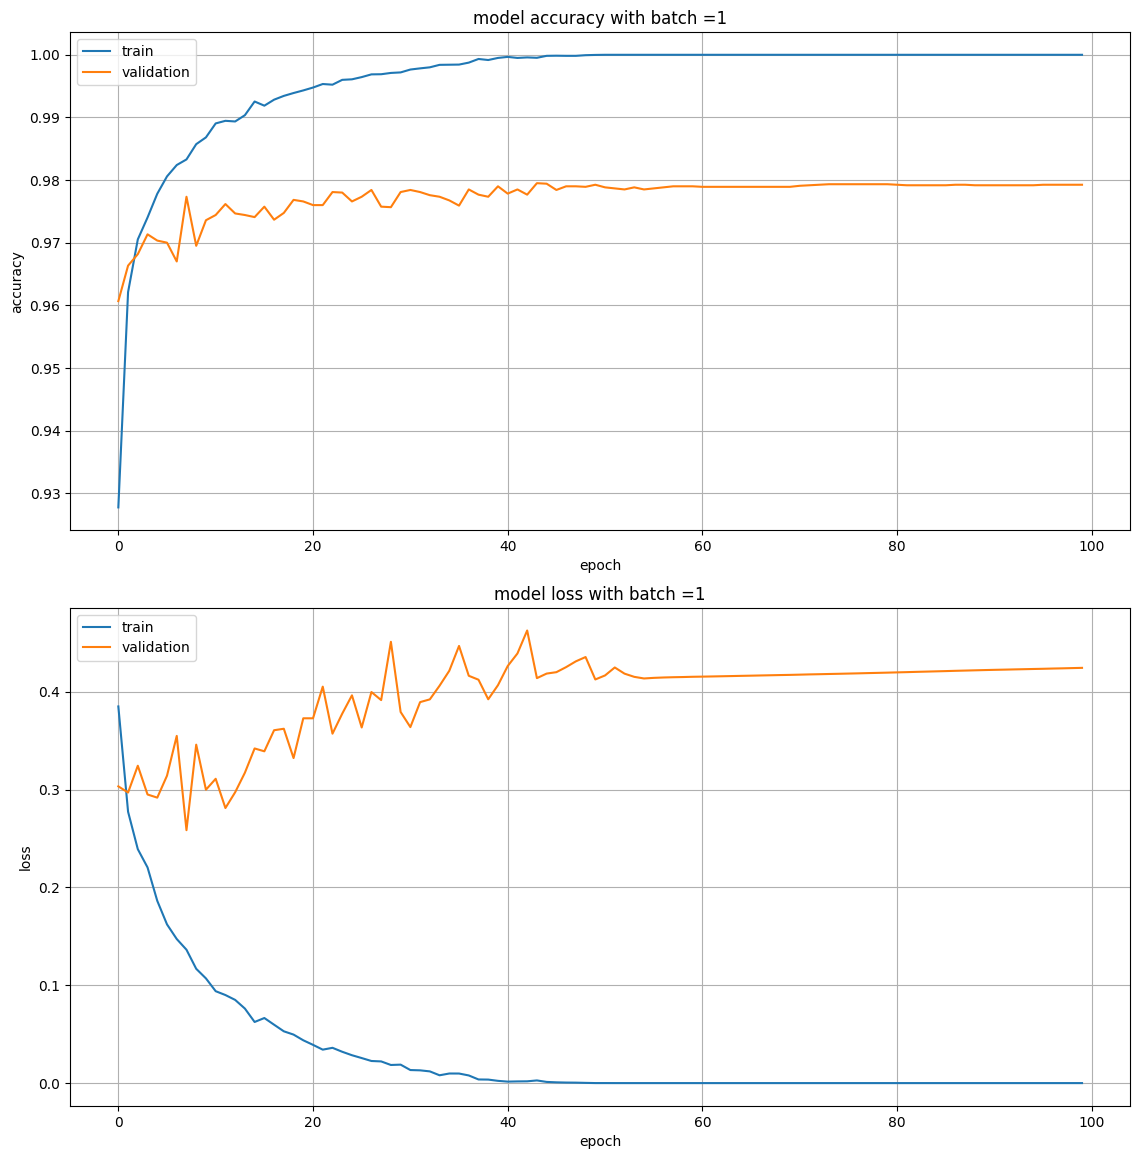

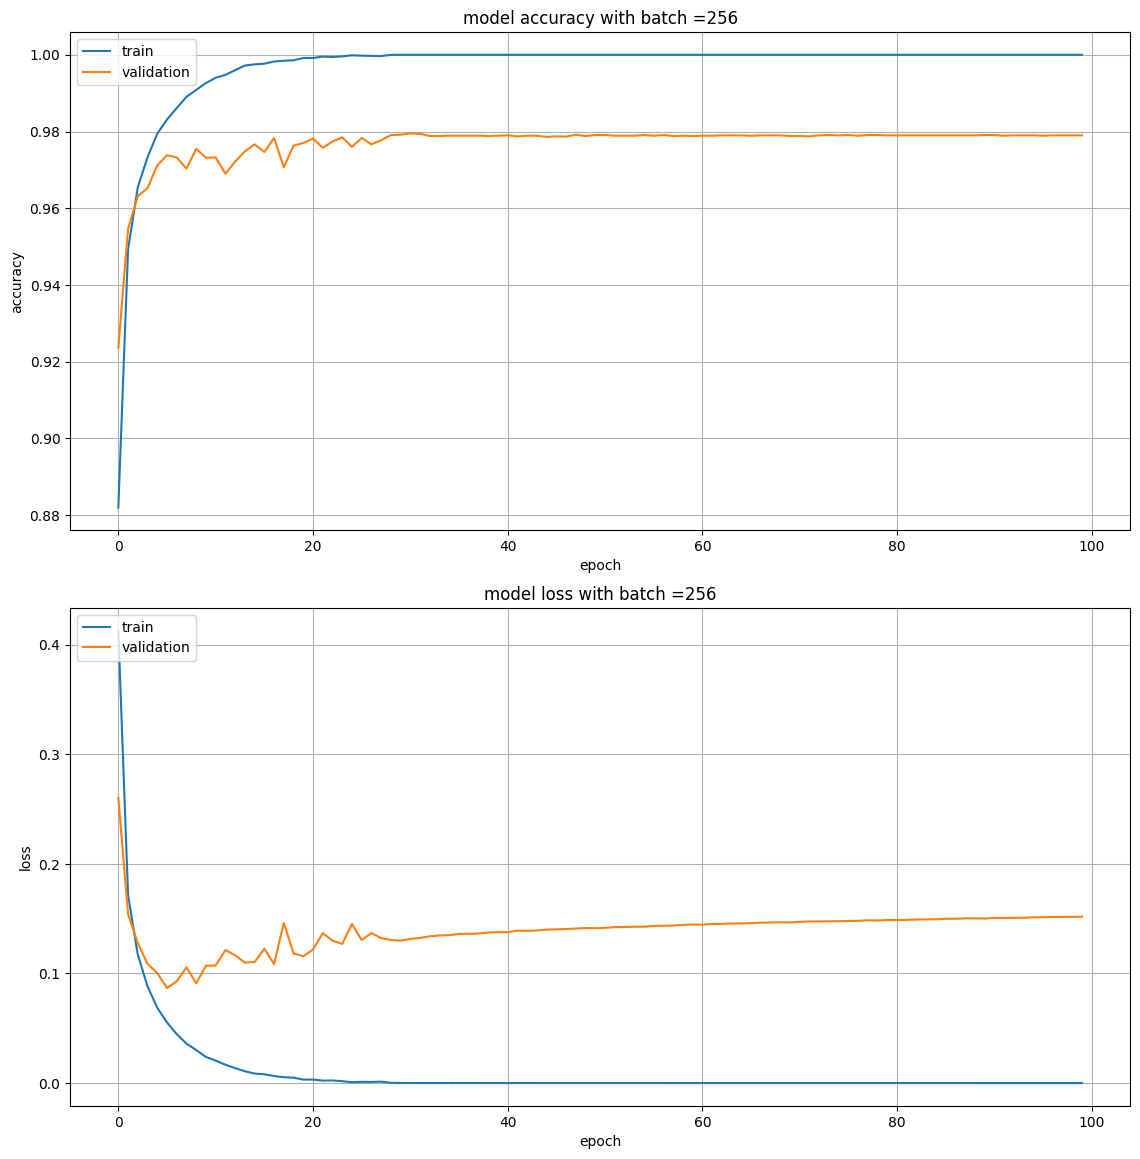

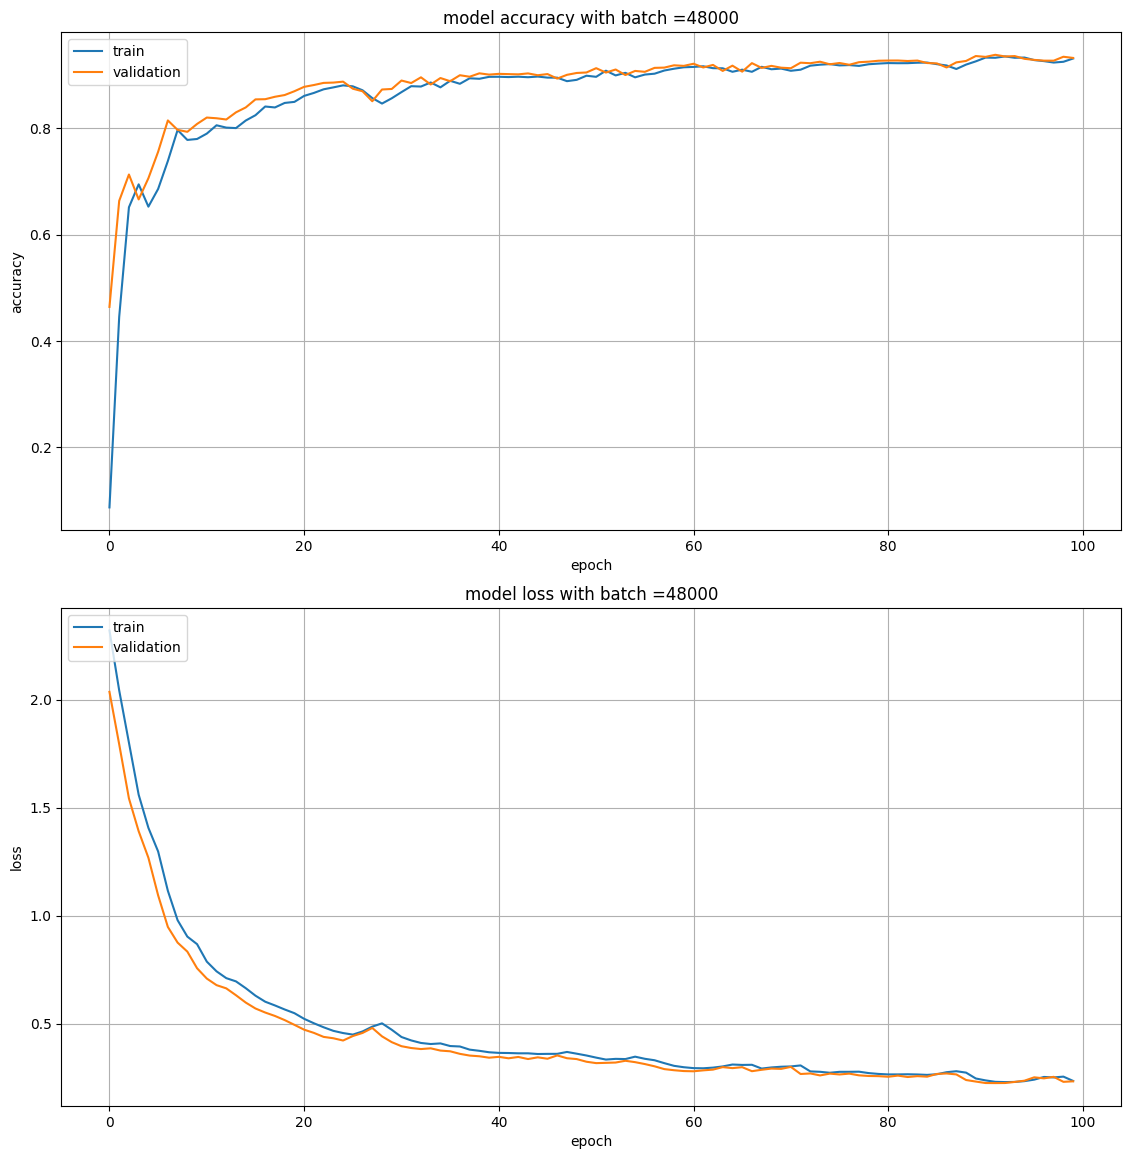

In [3]:
minibatch = [1, 256, len(Training_x)]  # [1, 256, Ntrain]
times = []

for batch_index in range(len(minibatch)):
    
    start = time.time()

    #define model
    model1 = Sequential()
    model1.add(Flatten(input_shape=(28, 28)))
    model1.add(Dense(128, activation='relu'))
    model1.add(Dense(256, activation='relu'))
    model1.add(Dense(10, activation='softmax'))
    model1.compile(loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[tf.keras.metrics.CategoricalAccuracy()])
    history1 = model1.fit(Training_x, Training_y, batch_size=minibatch[batch_index], epochs=n_epochs, validation_data=(Validation_x, Validation_y))
    
    times.append((time.time()-start))
    

    fig, axs = plt.subplots(2,figsize=(12,12))
    plt.tight_layout(pad = 3.5)

    axs[0].plot(history1.history['categorical_accuracy'])
    axs[0].plot(history1.history['val_categorical_accuracy'])
    axs[0].set_title('model accuracy with batch =' + str(minibatch[batch_index]))
    axs[0].set(xlabel='epoch', ylabel='accuracy')
    axs[0].legend(['train', 'validation'], loc='upper left')
    axs[0].grid()

    axs[1].plot(history1.history['loss'])
    axs[1].plot(history1.history['val_loss'])
    axs[1].set_title('model loss with batch =' + str(minibatch[batch_index]))
    axs[1].set(xlabel='epoch', ylabel='loss')
    axs[1].legend(['train', 'validation'], loc='upper left')
    axs[1].grid()

    fig.savefig('Accuracy and loss with batch =' + str(minibatch[batch_index]) + '.png')

    print("Time for batch = " + str(minibatch[batch_index]) + " is "+str(times[batch_index])+" sec")


Η αλλαγή του batch_size επηρεάζει σημαντικά το training και την απόδοση του MLP μοντέλου.  
Ο χρόνος εκτέλεσης του batch_size 1 ήταν 14443.5 δευτερόλεπτα, του batch_size 256 ήταν 111 δευτερόλεπτα ενώ του batch_size 48000 ήταν 43 δευτερόλεπτα.
Ο χρόνος που απαιτήθηκε για το training του batch_size 1 είναι απαγορευτικά μεγάλος και οδηγεί αναπόφευκτα σε overfitting όπως φαίνεται από τις καμπύλες μάθησης όπου το loss δεν παύει να αυξάνεται και έχει γενικά περίεργη μορφή. Αντίθετα για batch = 48000 η εκτέλεση διαρκεί λίγο ωστόσο το MLP δεν εκπαιδεύται ποτέ επαρκώς παρουσιάζοντας χαμηλό accuracy, δηλαδή είναι underfitted και θα απαιτούσε περισσότερες εποχές. Ένα καλό ενδιάμεσο εμφανίζεται να είναι το batch_size 256 όπου υπάρχει overfitting εξαιτίας του αριθμού εποχών ωστόσο το validation loss είναι χαμηλό, το accuracy πολύ υψηλό και ο χρόνος εκτέλεσης που απαιτείται είναι ικανοποιητικός. 

### MLP #4,5
#### Παραμετροποιήση του ρ χρησιμοποιώντας RMSProp optimizer με learning rate = 0.001

Epoch 1/100
188/188 [==============================] - 2s 7ms/step - loss: 0.4873 - categorical_accuracy: 0.8645 - val_loss: 0.2377 - val_categorical_accuracy: 0.9308
Epoch 2/100
188/188 [==============================] - 1s 6ms/step - loss: 0.2078 - categorical_accuracy: 0.9377 - val_loss: 0.1705 - val_categorical_accuracy: 0.9490
Epoch 3/100
188/188 [==============================] - 1s 6ms/step - loss: 0.1481 - categorical_accuracy: 0.9555 - val_loss: 0.1587 - val_categorical_accuracy: 0.9538
Epoch 4/100
188/188 [==============================] - 1s 6ms/step - loss: 0.1154 - categorical_accuracy: 0.9648 - val_loss: 0.1205 - val_categorical_accuracy: 0.9638
Epoch 5/100
188/188 [==============================] - 1s 6ms/step - loss: 0.0936 - categorical_accuracy: 0.9725 - val_loss: 0.1079 - val_categorical_accuracy: 0.9677
Epoch 6/100
188/188 [==============================] - 1s 6ms/step - loss: 0.0780 - categorical_accuracy: 0.9764 - val_loss: 0.1086 - val_categorical_accuracy: 0.969

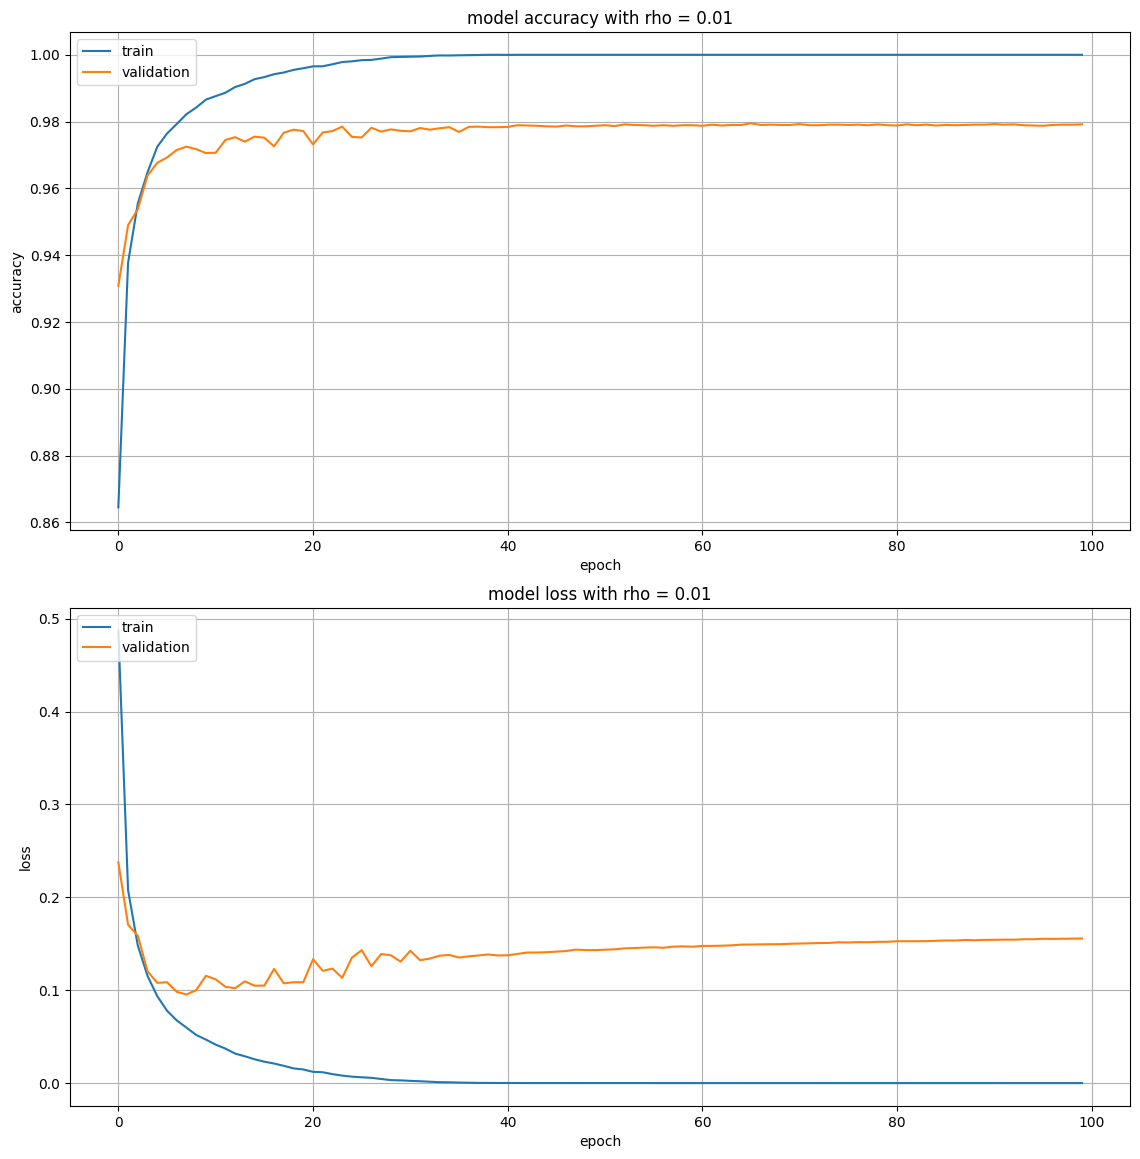

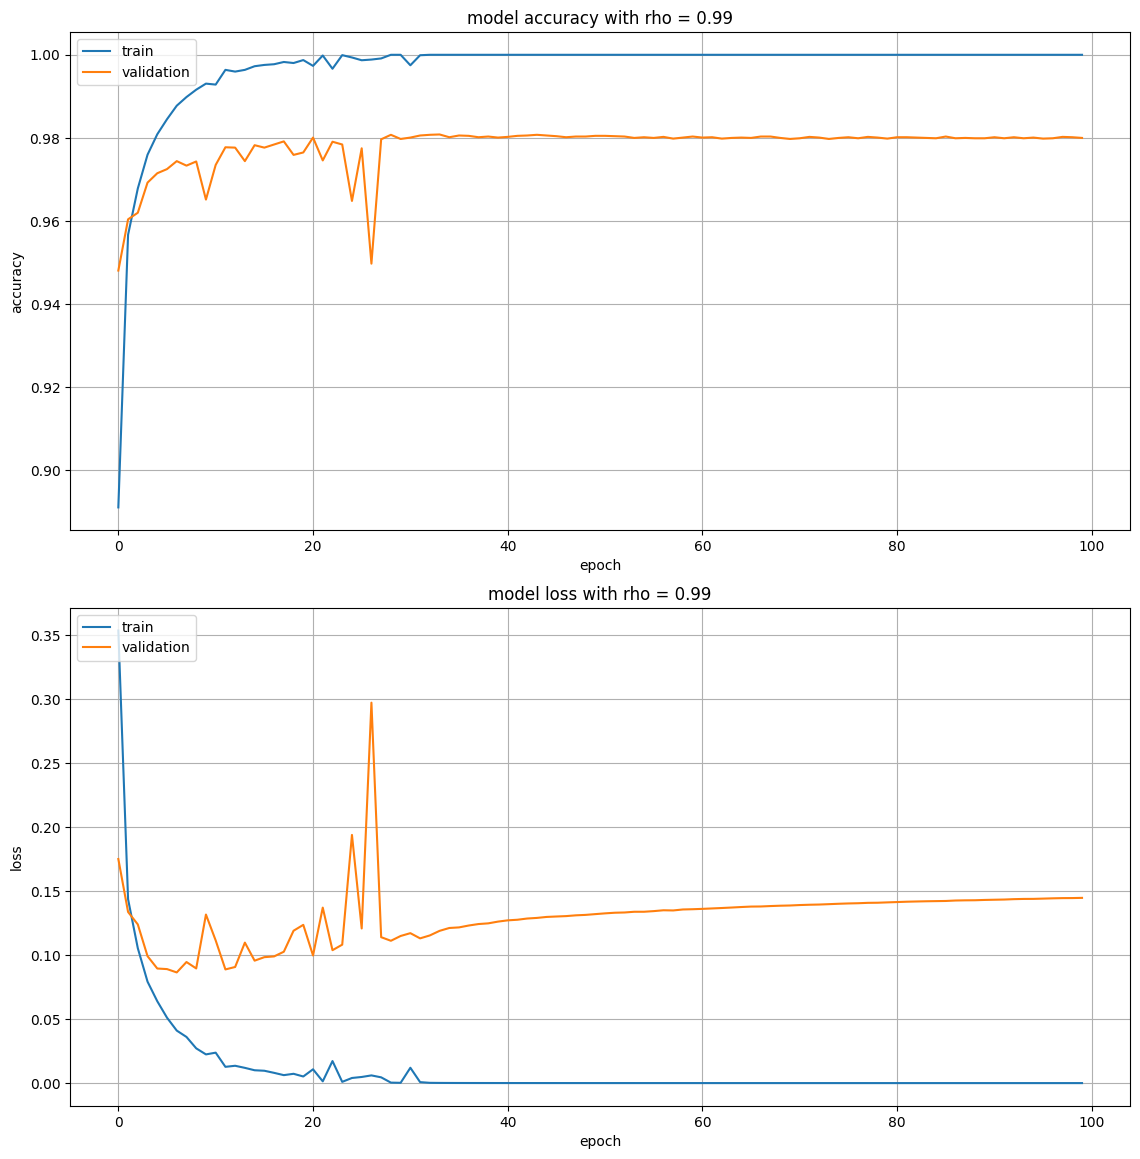

In [4]:
r = [0.01, 0.99]

for r_index in range(0, len(r)):

    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=r[r_index]), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[tf.keras.metrics.CategoricalAccuracy()])
    history = model.fit(Training_x, Training_y, batch_size=256, epochs=100, validation_data=(Validation_x, Validation_y))

    fig, axs = plt.subplots(2, figsize=(12,12))
    plt.tight_layout(pad = 3.5)

    axs[0].plot(history.history['categorical_accuracy'])
    axs[0].plot(history.history['val_categorical_accuracy'])
    axs[0].set_title('model accuracy with rho = ' + str(r[r_index]))
    axs[0].set(xlabel='epoch', ylabel='accuracy')
    axs[0].legend(['train', 'validation'], loc='upper left')
    axs[0].grid()

    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('model loss with rho = ' + str(r[r_index]))
    axs[1].set(xlabel='epoch', ylabel='loss')
    axs[1].legend(['train', 'validation'], loc='upper left')
    axs[1].grid()

    fig.savefig('Accuracy and loss with rho = ' + str(r[r_index]) + '.png')


Και τα δύο μοντέλα παρουσιάζουν overfitting καθώς αυξάνεται το validation loss με το πέρας των εποχών. Τα δύο μοντέλα έχουν παρόμοιες επιδόσεις στο τέλος της εκτέλεσης με το accuracy στο 0.99 και το validation loss στο 0.15. Χρησιμοποιώντας rho 0.01 το learning curve έχει μια πολύ πιο ομαλή πορεία ενώ με rho 0.99 υπάρχουν κάποια έντονα spikes κοντα στις 20-30 εποχές. Στην ελάχιστη τιμή το loss χρησιμοποιώντας rho 0.99 φαίνεται να επιτυγχάνει χαμηλότερες τιμές.

### MLP #6
#### Χρήση SGD optimizer με learning rate = 0.01 και αρχικοποίηση βαρών με κανονική κατανομή με μέση τιμή 10


Epoch 1/100
188/188 [==============================] - 2s 8ms/step - loss: 4388250112.0000 - categorical_accuracy: 0.1134 - val_loss: 2.3023 - val_categorical_accuracy: 0.1060
Epoch 2/100
188/188 [==============================] - 1s 7ms/step - loss: 2.3019 - categorical_accuracy: 0.1140 - val_loss: 2.3021 - val_categorical_accuracy: 0.1060
Epoch 3/100
188/188 [==============================] - 2s 9ms/step - loss: 2.3016 - categorical_accuracy: 0.1140 - val_loss: 2.3020 - val_categorical_accuracy: 0.1060
Epoch 4/100
188/188 [==============================] - 1s 8ms/step - loss: 2.3014 - categorical_accuracy: 0.1140 - val_loss: 2.3019 - val_categorical_accuracy: 0.1060
Epoch 5/100
188/188 [==============================] - 1s 7ms/step - loss: 2.3013 - categorical_accuracy: 0.1140 - val_loss: 2.3019 - val_categorical_accuracy: 0.1060
Epoch 6/100
188/188 [==============================] - 1s 7ms/step - loss: 2.3012 - categorical_accuracy: 0.1140 - val_loss: 2.3019 - val_categorical_accura

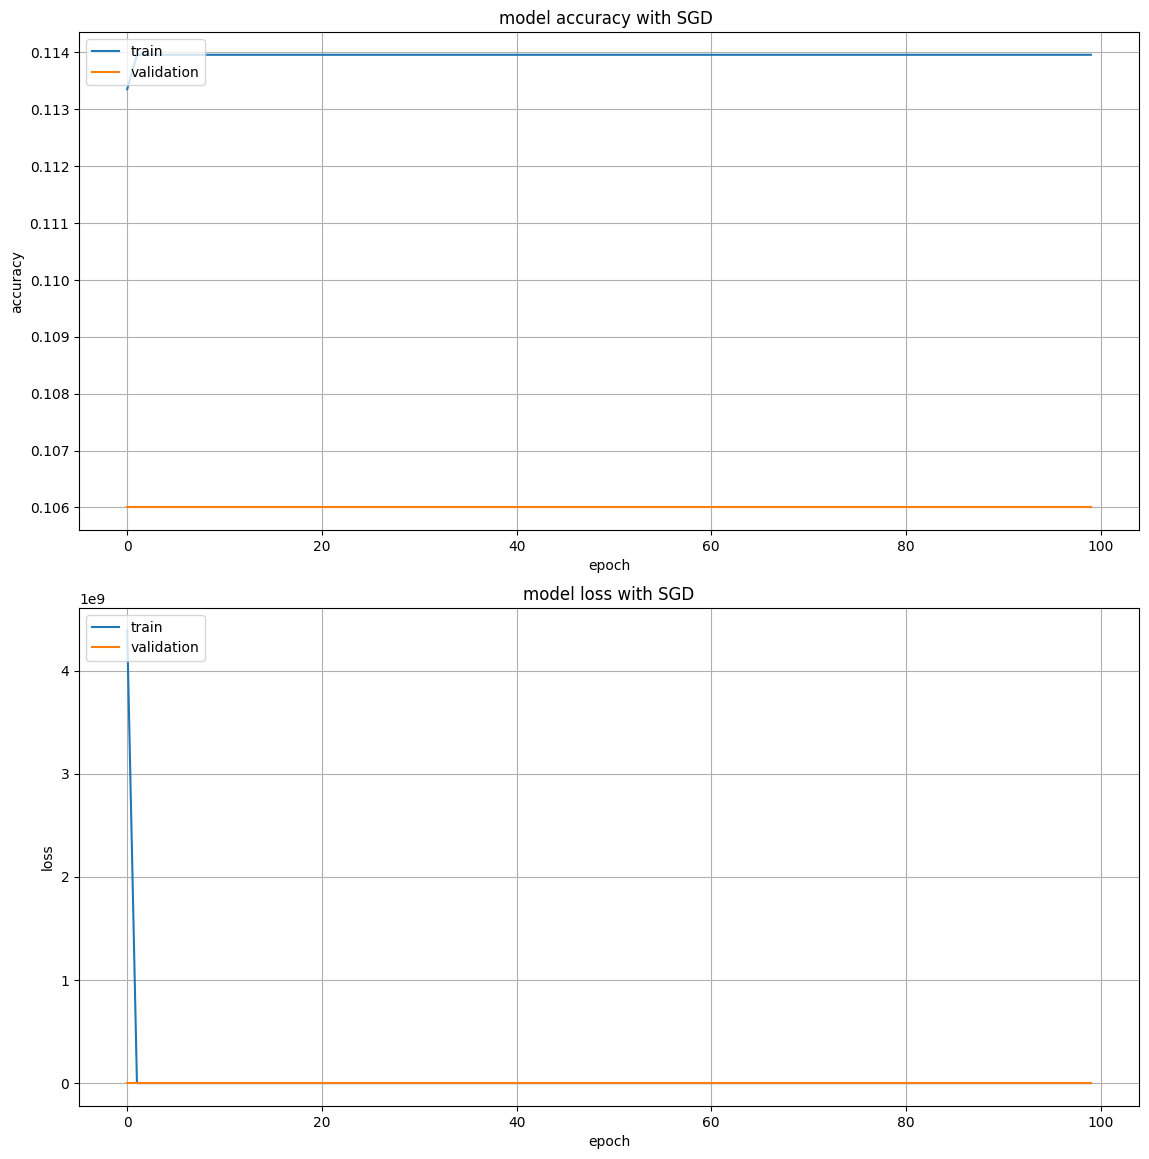

In [9]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=10.0)))  
model.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=10.0)))
model.add(Dense(10, activation='softmax', kernel_initializer=RandomNormal(mean=10.0)))
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[tf.keras.metrics.CategoricalAccuracy()])
history = model.fit(Training_x, Training_y, batch_size=256, epochs=100, validation_data=(Validation_x, Validation_y))


fig, axs = plt.subplots(2, figsize=(12,12))
plt.tight_layout(pad = 3.5)

axs[0].plot(history.history['categorical_accuracy'])
axs[0].plot(history.history['val_categorical_accuracy'])
axs[0].set_title('model accuracy with SGD ')
axs[0].set(xlabel='epoch', ylabel='accuracy')
axs[0].legend(['train', 'validation'], loc='upper left')
axs[0].grid()

axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('model loss with SGD')
axs[1].set(xlabel='epoch', ylabel='loss')
axs[1].legend(['train', 'validation'], loc='upper left')
axs[1].grid()

fig.savefig('Accuracy and loss with SGD.png')

Η αρχικοποιήση σε αυτήν την περίπτωση είναι τόσο μακρία από τις "βέλτιστες" τιμές που το μοντέλω δεν καταφέρνει μέχρι το πέρας των 100 εποχών να εκπαιδευτεί και παρουσιάζει πολύ χαμηλό accuracy και υψηλό σφάλμα. Μπορεί να παρουσιάζει πρόβλημα το normalization των δεδομένων που έχω κάνει. Αν χρησιμοποιηθεί μέση τιμή 10/255 η ποιότητα των αποτελεσμάτων αυξάνεται σημαντικά.  
Παρακάτω ξανατρέχω το MLP #6 με mean 10/255 και όπου θα χρησιμοποιούσα mean=10 από εδώ και κάτω θα χρησιμοποιήσω 10/255.

Epoch 1/100
188/188 [==============================] - 3s 10ms/step - loss: 14.8727 - categorical_accuracy: 0.3873 - val_loss: 1.5017 - val_categorical_accuracy: 0.7148
Epoch 2/100
188/188 [==============================] - 1s 7ms/step - loss: 1.2020 - categorical_accuracy: 0.7644 - val_loss: 0.8977 - val_categorical_accuracy: 0.8202
Epoch 3/100
188/188 [==============================] - 1s 8ms/step - loss: 0.7752 - categorical_accuracy: 0.8227 - val_loss: 0.6238 - val_categorical_accuracy: 0.8555
Epoch 4/100
188/188 [==============================] - 1s 7ms/step - loss: 0.5963 - categorical_accuracy: 0.8528 - val_loss: 0.5236 - val_categorical_accuracy: 0.8645
Epoch 5/100
188/188 [==============================] - 1s 7ms/step - loss: 0.5128 - categorical_accuracy: 0.8659 - val_loss: 0.4604 - val_categorical_accuracy: 0.8769
Epoch 6/100
188/188 [==============================] - 1s 7ms/step - loss: 0.4632 - categorical_accuracy: 0.8760 - val_loss: 0.4179 - val_categorical_accuracy: 0.8

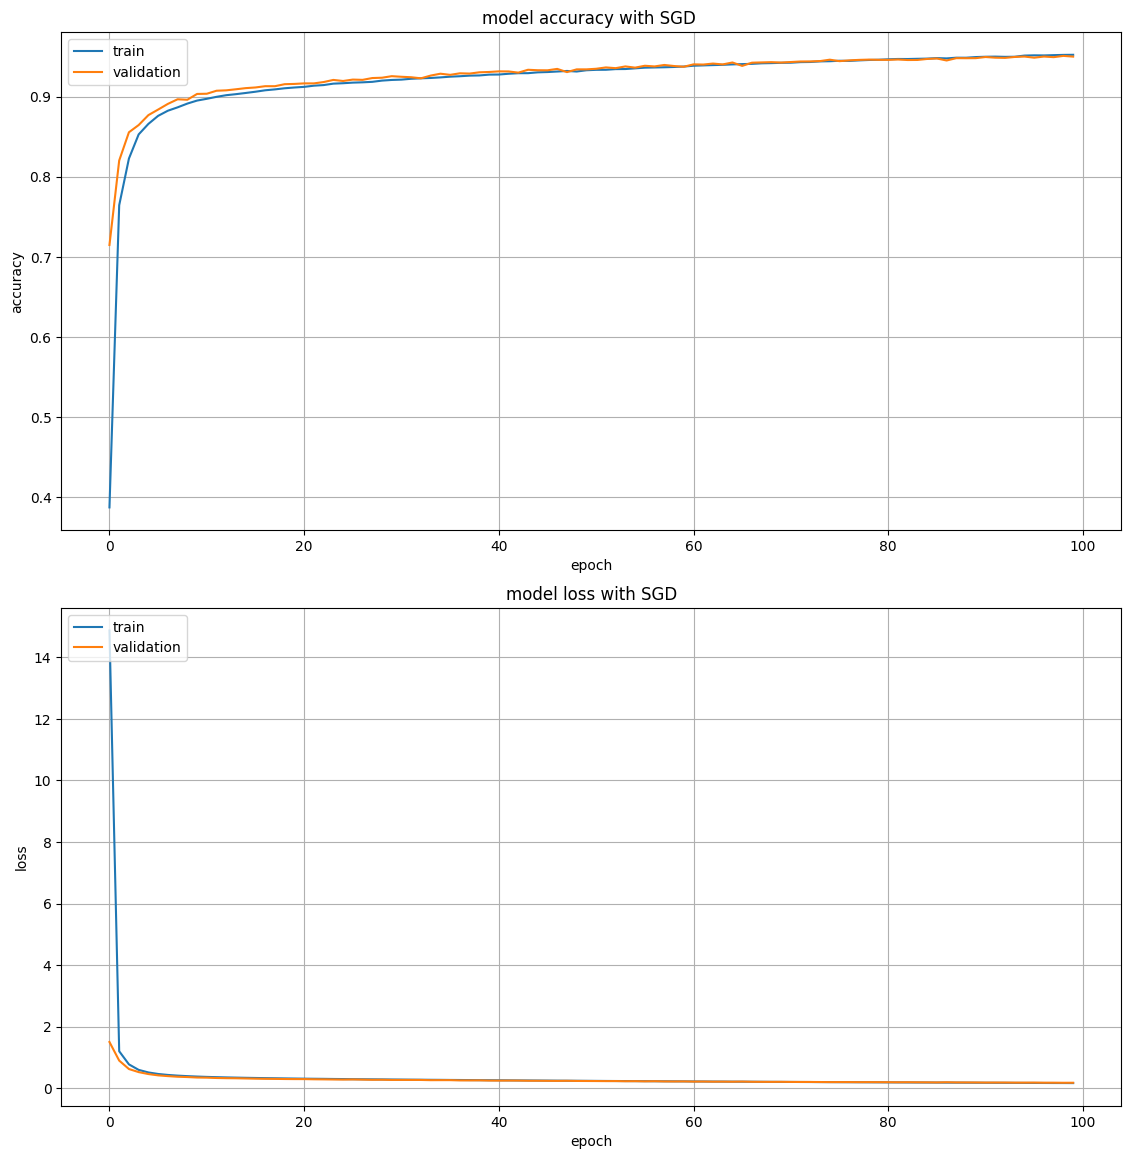

In [10]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=10.0/255)))  
model.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=10.0/255)))
model.add(Dense(10, activation='softmax', kernel_initializer=RandomNormal(mean=10.0/255)))
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[tf.keras.metrics.CategoricalAccuracy()])
history = model.fit(Training_x, Training_y, batch_size=256, epochs=100, validation_data=(Validation_x, Validation_y))


fig, axs = plt.subplots(2, figsize=(12,12))
plt.tight_layout(pad = 3.5)

axs[0].plot(history.history['categorical_accuracy'])
axs[0].plot(history.history['val_categorical_accuracy'])
axs[0].set_title('model accuracy with SGD ')
axs[0].set(xlabel='epoch', ylabel='accuracy')
axs[0].legend(['train', 'validation'], loc='upper left')
axs[0].grid()

axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('model loss with SGD')
axs[1].set(xlabel='epoch', ylabel='loss')
axs[1].legend(['train', 'validation'], loc='upper left')
axs[1].grid()

fig.savefig('Accuracy and loss with SGD.png')

Αρχικοποιώντας με mean 10/255 τα αποτελέσματα είναι πολύ καλύτερα. Το accuracy είναι υψηλό και το loss χαμηλό τόσο του train όσο και του validation. Το accuracy όπως και το loss δεν είναι καλύτερο από τα άλλα μοντέλα ωστόσο δεν φαίνεται να είναι overfitted το μοντέλο καθώς το train και το validation loss είναι πολύ κοντά. Πιθανώς να είναι underfitted.

### MLP #7,8,9
#### Κανονικοποίηση με L2 νόρμα παραμετροποιώντας το α και χρησιμοποιώντας τις ίδιες επιλογές με το MLP #6

Epoch 1/100
188/188 [==============================] - 2s 7ms/step - loss: 1784037113856.0000 - categorical_accuracy: 0.1136 - val_loss: 1208549638144.0000 - val_categorical_accuracy: 0.1060
Epoch 2/100
188/188 [==============================] - 1s 6ms/step - loss: 851649626112.0000 - categorical_accuracy: 0.1140 - val_loss: 569308938240.0000 - val_categorical_accuracy: 0.1060
Epoch 3/100
188/188 [==============================] - 1s 6ms/step - loss: 401184849920.0000 - categorical_accuracy: 0.1140 - val_loss: 268183011328.0000 - val_categorical_accuracy: 0.1060
Epoch 4/100
188/188 [==============================] - 1s 6ms/step - loss: 188985229312.0000 - categorical_accuracy: 0.1140 - val_loss: 126332444672.0000 - val_categorical_accuracy: 0.1060
Epoch 5/100
188/188 [==============================] - 1s 6ms/step - loss: 89024888832.0000 - categorical_accuracy: 0.1140 - val_loss: 59511152640.0000 - val_categorical_accuracy: 0.1060
Epoch 6/100
188/188 [==============================] - 

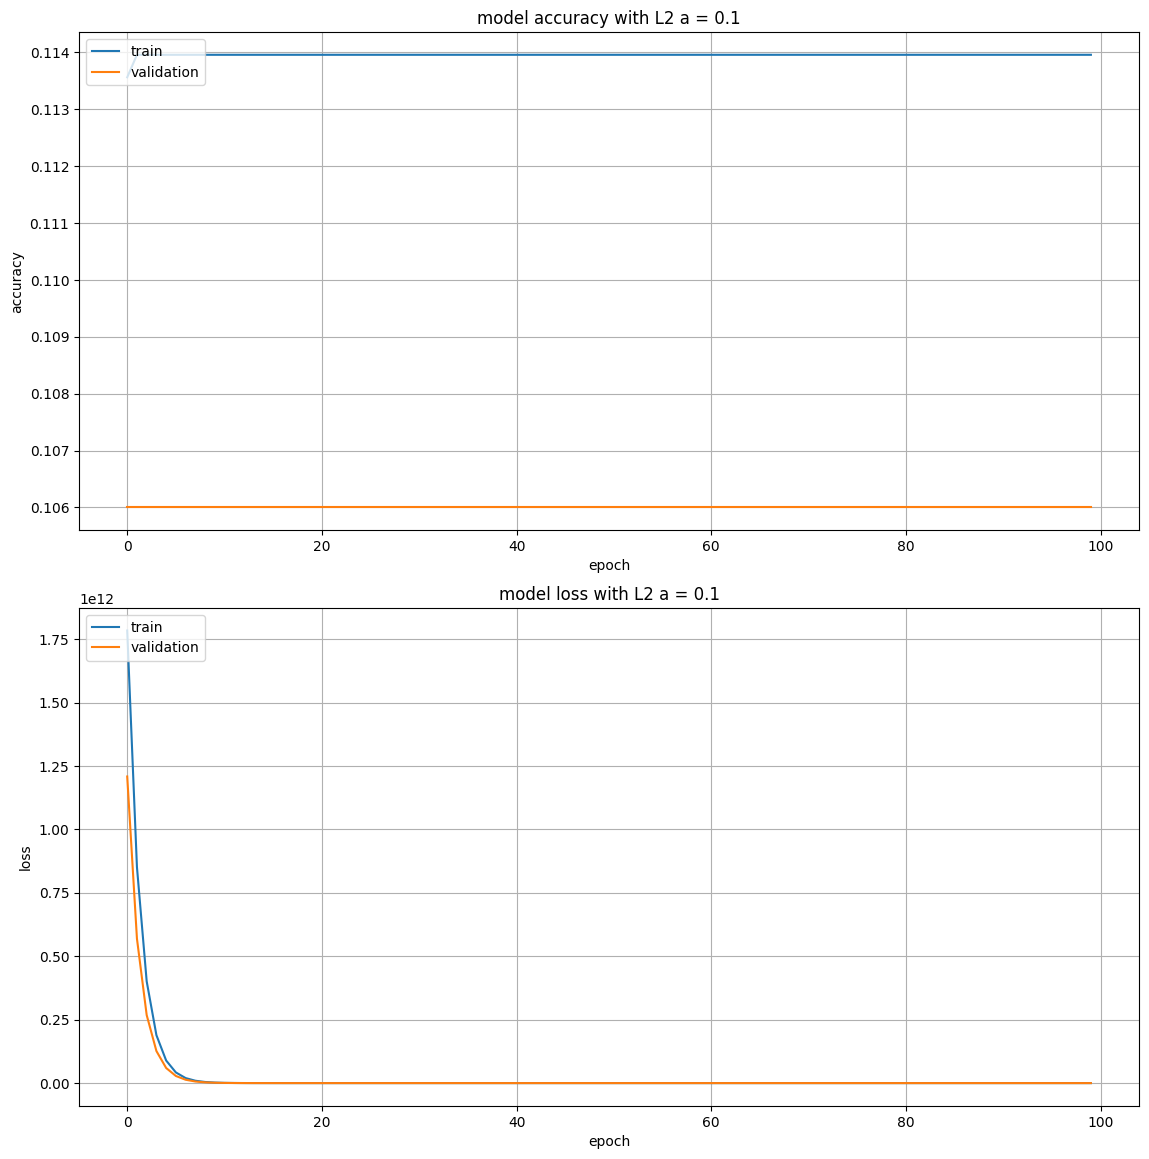

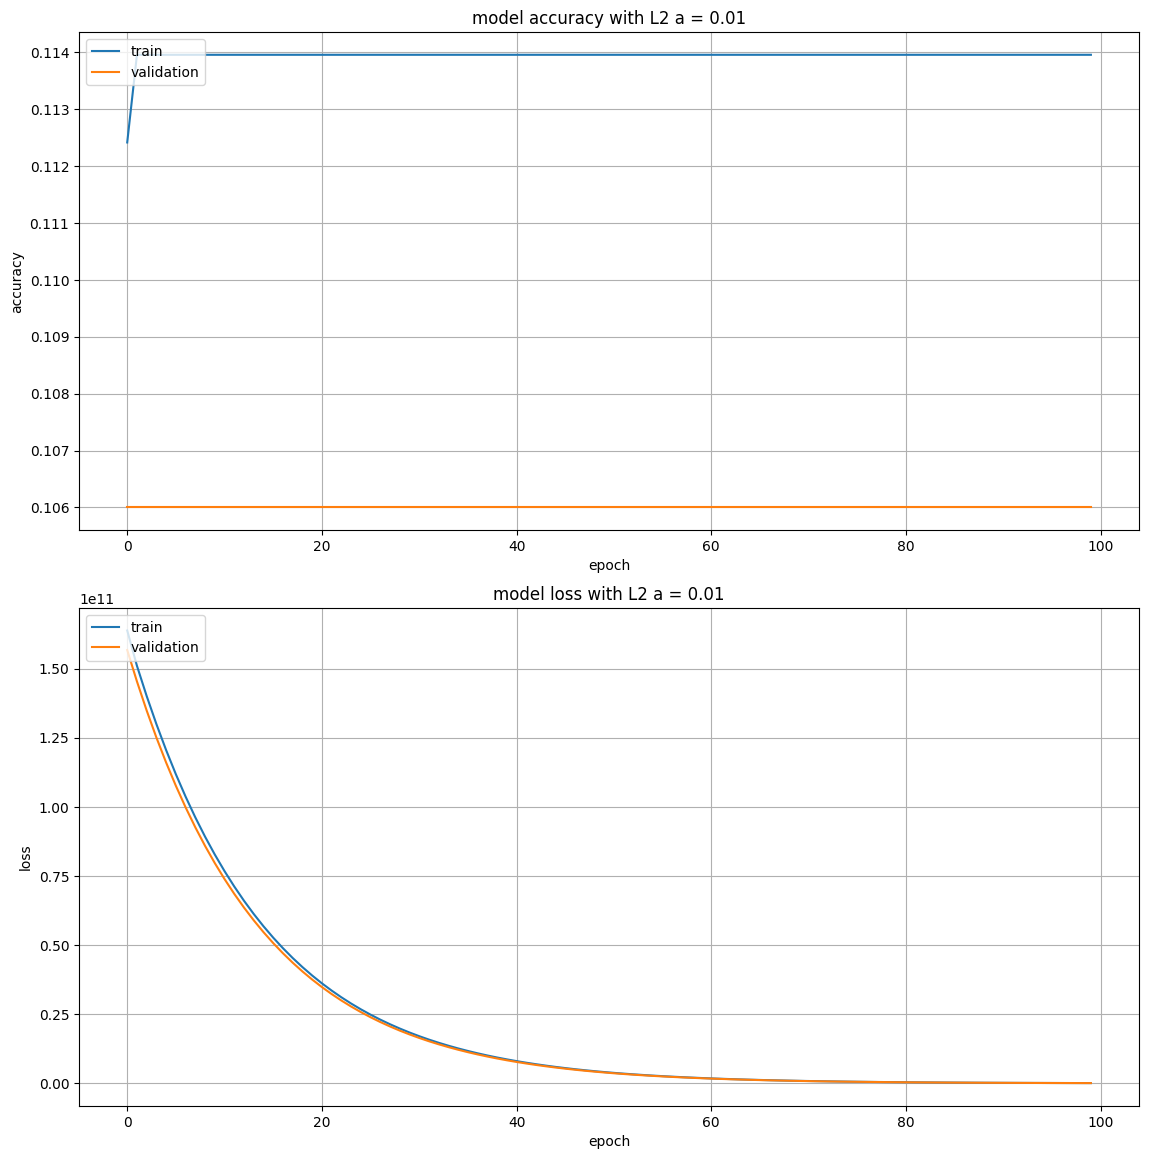

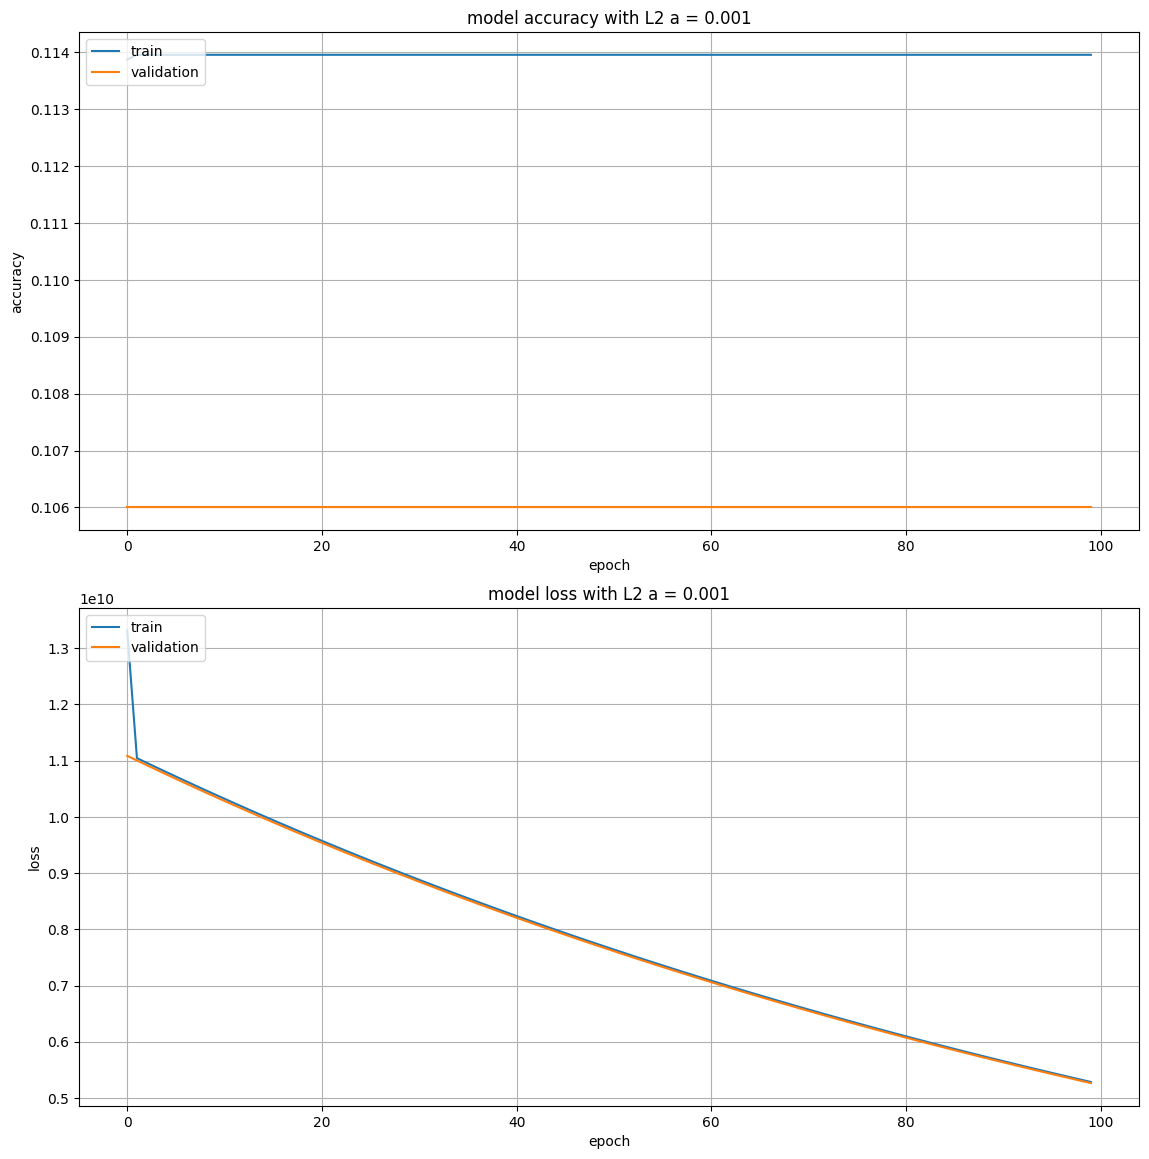

In [6]:
reg2 = [0.1 , 0.01 , 0.001]

for reg2_index in range(0, len(reg2)):
    
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=10.0/255), kernel_regularizer=regularizers.L2(reg2[reg2_index])))
    model.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=10.0/255), kernel_regularizer=regularizers.L2(reg2[reg2_index])))
    model.add(Dense(10, activation='softmax', kernel_initializer=RandomNormal(mean=10.0/255), kernel_regularizer=regularizers.L2(reg2[reg2_index])))
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[tf.keras.metrics.CategoricalAccuracy()])
    
    history = model.fit(Training_x, Training_y, batch_size=256, epochs=100, validation_data=(Validation_x, Validation_y))

    
    fig, axs = plt.subplots(2, figsize=(12,12))
    plt.tight_layout(pad = 3.5)
    axs[0].plot(history.history['categorical_accuracy'])
    axs[0].plot(history.history['val_categorical_accuracy'])
    axs[0].set_title('model accuracy with L2 a = ' + str(reg2[reg2_index]))
    axs[0].set(xlabel='epoch', ylabel='accuracy')
    axs[0].legend(['train', 'validation'], loc='upper left')
    axs[0].grid()

    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('model loss with L2 a = ' + str(reg2[reg2_index]))
    axs[1].set(xlabel='epoch', ylabel='loss')
    axs[1].legend(['train', 'validation'], loc='upper left')
    axs[1].grid()

    fig.savefig('Accuracy and loss with L2 a = ' + str(reg2[reg2_index]) + '.png')

Το MLP με α = 0.1 φαίνεται να συγκλίνει σε κάποια σταθερή τιμή ωστόσο δίνει αρκετά κακά αποτελέσματα με πολύ χαμηλό accuracy. Τα άλλα 2 μοντέλα έχουν πολύ χαμηλό αλλά σταθερό accuracy καθ'όλη την εκτέλεση τους  συγκρίσιμο με αυτό του πρώτου μοντέλου ωστόσο το loss παίρνει πολύ πολύ μεγάλες τιμές που μειώνονται ελαφρώς αλλά παραμένουν πολύ υψηλές.

Γενικότερα η χρήση L2 νόρμας και η αρχικοποίηση των βαρών φαίνεται να αποτελούν αναποτελεσματικό συνδιασμό που οδηγεί σε κακά μοντέλα.

### MLP #10
#### Κανονικοποίηση με L1 νόρμα με α = 0.01 και εισαγωγή dropout layer με πιθανότητα 0.3

Epoch 1/100
188/188 [==============================] - 2s 9ms/step - loss: 53.6404 - categorical_accuracy: 0.3246 - val_loss: 42.4803 - val_categorical_accuracy: 0.6467
Epoch 2/100
188/188 [==============================] - 1s 8ms/step - loss: 33.4458 - categorical_accuracy: 0.5310 - val_loss: 25.1430 - val_categorical_accuracy: 0.6859
Epoch 3/100
188/188 [==============================] - 1s 7ms/step - loss: 18.9015 - categorical_accuracy: 0.5461 - val_loss: 13.4255 - val_categorical_accuracy: 0.6486
Epoch 4/100
188/188 [==============================] - 1s 8ms/step - loss: 9.8156 - categorical_accuracy: 0.4777 - val_loss: 6.9620 - val_categorical_accuracy: 0.4503
Epoch 5/100
188/188 [==============================] - 1s 8ms/step - loss: 5.5181 - categorical_accuracy: 0.3054 - val_loss: 4.3784 - val_categorical_accuracy: 0.2087
Epoch 6/100
188/188 [==============================] - 1s 8ms/step - loss: 3.6290 - categorical_accuracy: 0.1549 - val_loss: 3.0359 - val_categorical_accuracy:

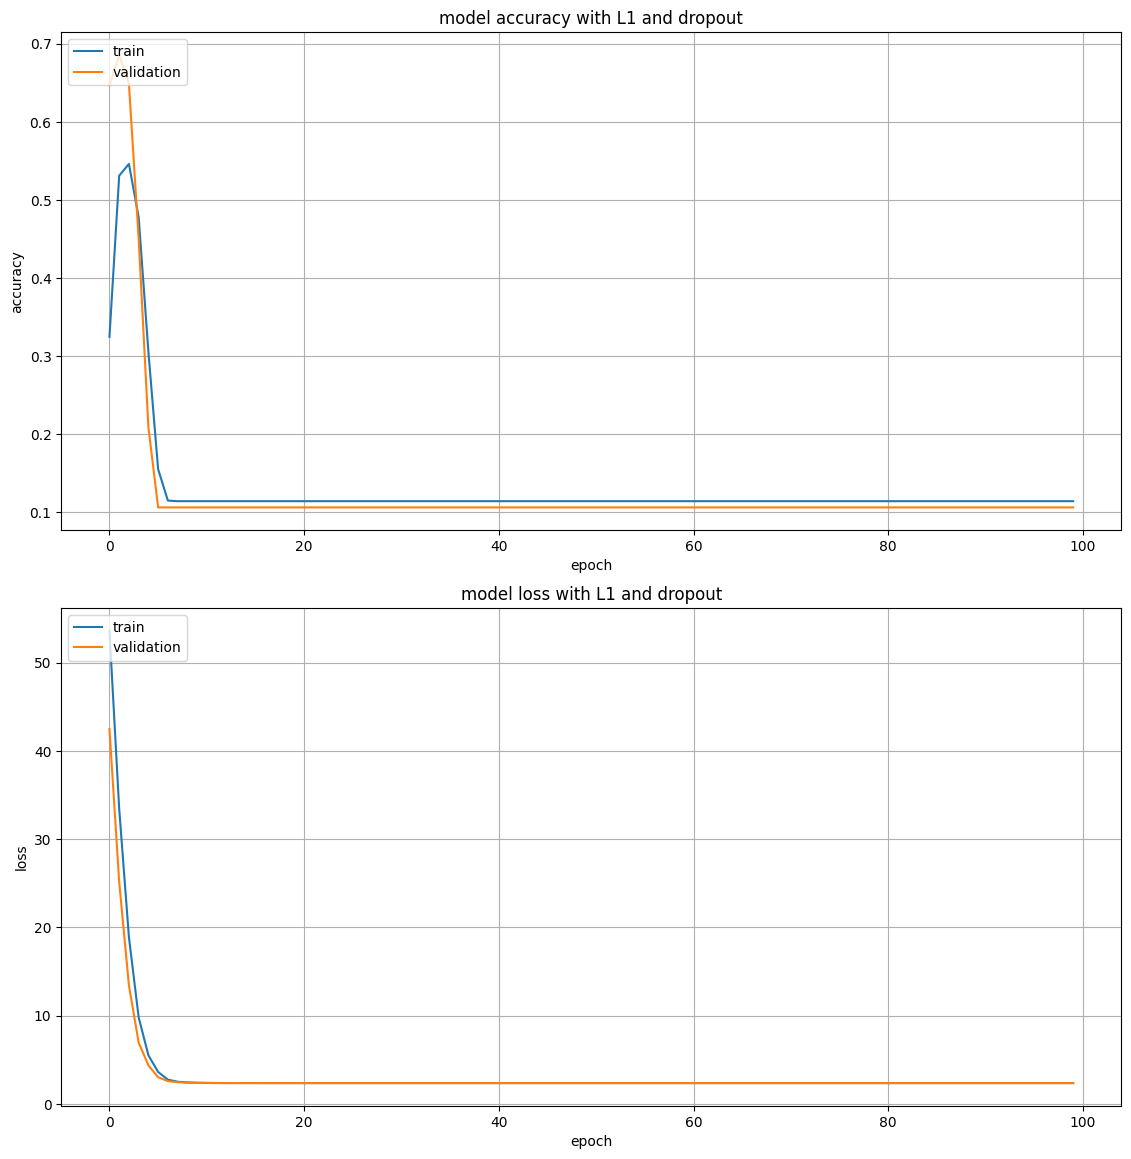

In [7]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu', kernel_regularizer= regularizers.L1(0.01)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', kernel_regularizer= regularizers.L1(0.01)))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax', kernel_regularizer= regularizers.L1(0.01)))
model.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[tf.keras.metrics.CategoricalAccuracy()])
history = model.fit(Training_x, Training_y, batch_size=256, epochs=100, validation_data=(Validation_x, Validation_y))


fig, axs = plt.subplots(2, figsize=(12,12))
plt.tight_layout(pad = 3.5)

axs[0].plot(history.history['categorical_accuracy'])
axs[0].plot(history.history['val_categorical_accuracy'])
axs[0].set_title('model accuracy with L1 and dropout')
axs[0].set(xlabel='epoch', ylabel='accuracy')
axs[0].legend(['train', 'validation'], loc='upper left')
axs[0].grid()

axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('model loss with L1 and dropout')
axs[1].set(xlabel='epoch', ylabel='loss')
axs[1].legend(['train', 'validation'], loc='upper left')
axs[1].grid()

fig.savefig("Accuracy and loss with with L1 and dropout.png")

Το μοντέλο αυτό παρουσιάζει αρχικά πολύ μεγάλο σφάλμα και όχι πολύ χαμηλό accuracy και καθώς το σφάλμα μειώνεται μειώνεται και η ακρίβεια. Το loss δεν φτάνει ποτέ ικανοποιητικά επίπεδα και το accuracy γίνεται πολύ χαμηλό. Το validation accuracy φτάνει πολύ γρήγορα στην τιμή 0.106 και δεν βελτιώνεται άλλο. Το μοντέλο δεν είναι ικανό να παράγει αξιόπιστες προβέψεις όπως και τα 7,8,9.

## Μέρος 2ο : Fine Tuning
#### Εκτέλεση grid search με 5-fold cross validation για την εύρεση των βέλτιστων παραμέτρων





In [12]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [4]:
from sklearn.model_selection import KFold
from keras.initializers import HeNormal
from keras.callbacks import EarlyStopping
from keras import backend as K
from sklearn.metrics import confusion_matrix



(Training_x, Training_y), (Testing_x, Testing_y) = tf.keras.datasets.mnist.load_data()

Training_x = Training_x/255
Training_y = np_utils.to_categorical(Training_y, 10)


n_h1 = [64, 128]
n_h2 = [256, 512]
a = [0.1, 0.001, 0.000001]
lr = [0.1, 0.01, 0.001]

f_metrics = np.zeros((2,2,3,3))


for nh1_index in range(0, len(n_h1)):
    for nh2_index in range(0, len(n_h2)):
        for a_index in range(0, len(a)):
            for lr_index in range(0, len(lr)):
                print(f'Running: n_h1= ' + str(n_h1[nh1_index]) + ' n_h2= ' + str(n_h2[nh2_index]) + ' a= ' + str(a[a_index]) + ' and lr= ' + str(lr[lr_index]))

                kf = KFold(5)
                f = []

                for i, (train_index, test_index) in enumerate(kf.split(Training_x)):
                    print('in fold : ' + str(i))
                    model = Sequential()
                    model.add(Flatten(input_shape=(28, 28)))
                    model.add(Dense(n_h1[nh1_index], activation='relu', kernel_regularizer=regularizers.L2(a[a_index]), kernel_initializer=HeNormal()))
                    model.add(Dense(n_h2[nh2_index], activation='relu', kernel_regularizer=regularizers.L2(a[a_index]), kernel_initializer=HeNormal()))
                    model.add(Dense(10, activation='softmax', kernel_regularizer=regularizers.L2(a[a_index]), kernel_initializer=HeNormal()))
                    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=lr[lr_index]), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[f1_m])
                    history = model.fit(Training_x[train_index], Training_y[train_index],verbose=2 ,batch_size=256, epochs=1000, validation_data=(Training_x[test_index], Training_y[test_index]), callbacks=[EarlyStopping(monitor='val_f1_m', patience=200, mode="max")])
                    f.append(max(history.history['val_f1_m']))

                f_metrics[nh1_index][nh2_index][a_index][lr_index] = sum(f) / 5


print(f_metrics)

maxf = f_metrics.max()
print(maxf)
print(np.where(f_metrics== maxf))


Running: n_h1= 64 n_h2= 256 a= 0.1 and lr= 0.1
in fold : 0
Epoch 1/1000
188/188 - 2s - loss: 30.8845 - f1_m: 0.0147 - val_loss: 17.4564 - val_f1_m: 0.0000e+00 - 2s/epoch - 12ms/step
Epoch 2/1000
188/188 - 1s - loss: 19.4966 - f1_m: 4.1234e-05 - val_loss: 19.5909 - val_f1_m: 0.0000e+00 - 942ms/epoch - 5ms/step
Epoch 3/1000
188/188 - 1s - loss: 19.5680 - f1_m: 0.0000e+00 - val_loss: 19.5832 - val_f1_m: 0.0000e+00 - 974ms/epoch - 5ms/step
Epoch 4/1000
188/188 - 1s - loss: 19.5690 - f1_m: 0.0000e+00 - val_loss: 19.5761 - val_f1_m: 0.0000e+00 - 967ms/epoch - 5ms/step
Epoch 5/1000
188/188 - 1s - loss: 19.5686 - f1_m: 0.0000e+00 - val_loss: 19.5691 - val_f1_m: 0.0000e+00 - 900ms/epoch - 5ms/step
Epoch 6/1000
188/188 - 1s - loss: 19.5691 - f1_m: 0.0000e+00 - val_loss: 19.5601 - val_f1_m: 0.0000e+00 - 964ms/epoch - 5ms/step
Epoch 7/1000
188/188 - 1s - loss: 19.5695 - f1_m: 0.0000e+00 - val_loss: 19.5869 - val_f1_m: 0.0000e+00 - 995ms/epoch - 5ms/step
Epoch 8/1000
188/188 - 1s - loss: 19.5692 - 

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

To error της εκτέλεσης υπήρξε μετά την ολοκλήρωση του 5 fold cross validation και δεν επηρέασε τα αποτελέσματα. Έγινε ένα λάθος στον τελικό υπολογισμό των f μετρικών ωστόσο η διαφορά ανάμεσα στην καλύτερη και στην χειρότερη τιμή δεν επηρεάστηκε, ο κώδικας όπως φαίνεται παραπάνω είναι διορθωμένος ωστόσο ο χρόνος εκτέλεσης ήταν πολύ μεγάλος για να επαναλάβω την εκτέλεση.

### Tuned MLP μοντέλο 
#### Τα βέλτιστα είναι:
* Αριθμός νευρώνων για το πρώτο επίπεδο 128
* Αριθμός νευρώνων για το δεύτερο επίπεδο 512 
* L2 νόρμα με α = 0.000001
* Learning rate 0.001

Τα αποτελέσματα αυτά είναι αναμενόμενα. Η χρήση περισσότερων νευρώνων καθιστά πιο πολύπλοκο το μοντέλο, πιο αποτελεσματικό αλλά απαιτεί περισσότερο χρόνο η εκπαιδεύση του. Η χρήση πολύ μικρού α με L2 νόρμα κάνει μικρή την επίδραση της νόρμας που δεν ήταν πολύ αποτελεσματική με μεγαλύτερα α όπως παρατηρήθηκε στα μοντέλα 6-10

Epoch 1/1000
188/188 [==============================] - 3s 10ms/step - loss: 0.3712 - f1_m: 0.8757 - precision_m: 0.9274 - recall_m: 0.8445 - categorical_accuracy: 0.8929 - val_loss: 0.1804 - val_f1_m: 0.9490 - val_precision_m: 0.9614 - val_recall_m: 0.9369 - val_categorical_accuracy: 0.9481
Epoch 2/1000
188/188 [==============================] - 1s 8ms/step - loss: 0.1523 - f1_m: 0.9553 - precision_m: 0.9639 - recall_m: 0.9468 - categorical_accuracy: 0.9545 - val_loss: 0.1335 - val_f1_m: 0.9627 - val_precision_m: 0.9686 - val_recall_m: 0.9568 - val_categorical_accuracy: 0.9619
Epoch 3/1000
188/188 [==============================] - 2s 8ms/step - loss: 0.1059 - f1_m: 0.9688 - precision_m: 0.9744 - recall_m: 0.9633 - categorical_accuracy: 0.9686 - val_loss: 0.1088 - val_f1_m: 0.9684 - val_precision_m: 0.9728 - val_recall_m: 0.9640 - val_categorical_accuracy: 0.9679
Epoch 4/1000
188/188 [==============================] - 1s 8ms/step - loss: 0.0792 - f1_m: 0.9768 - precision_m: 0.9802 - r

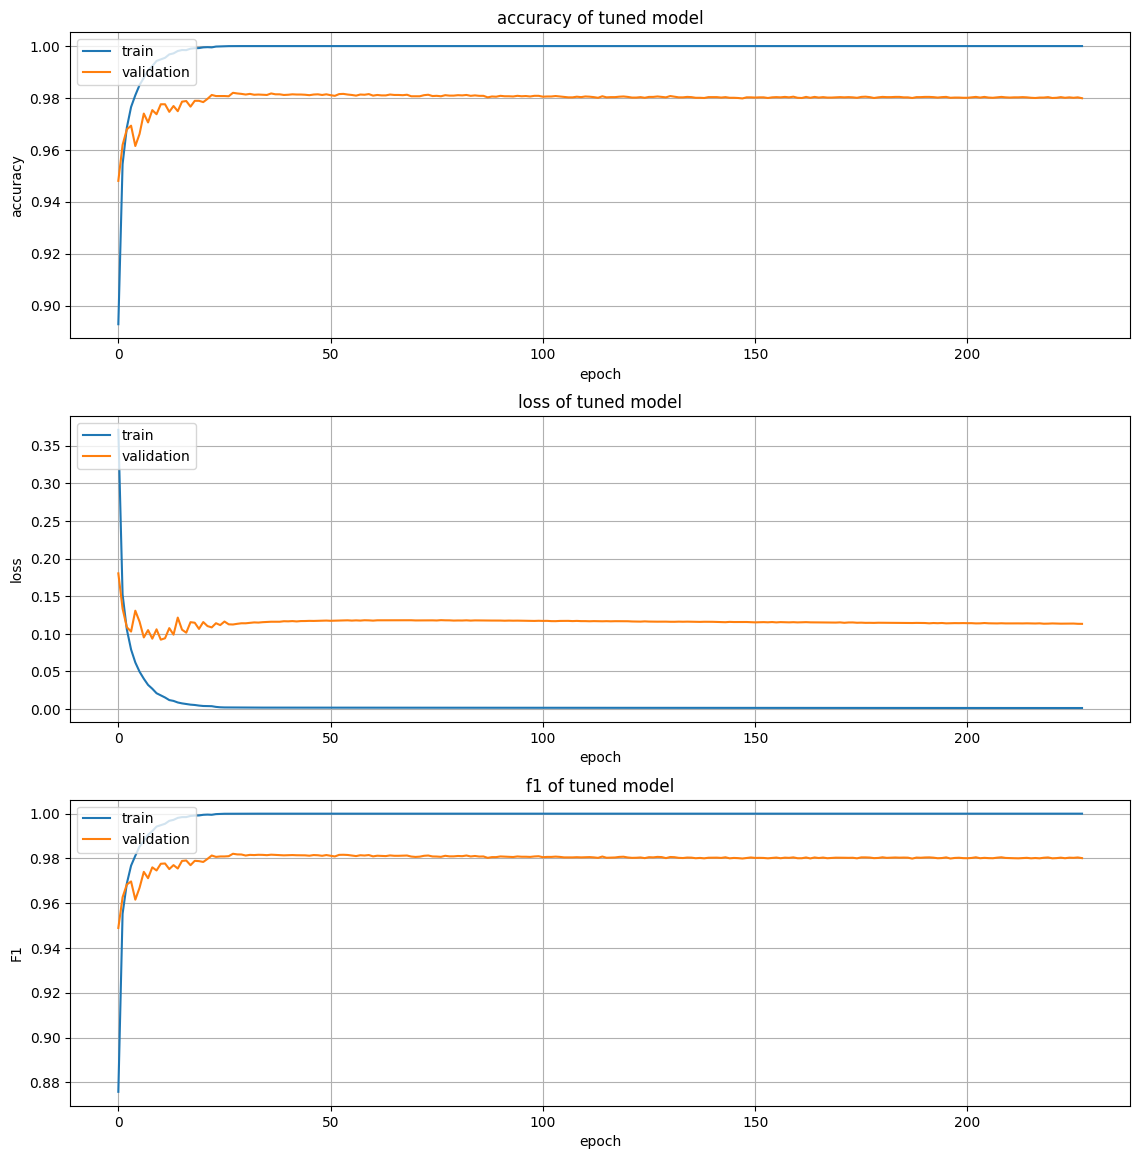

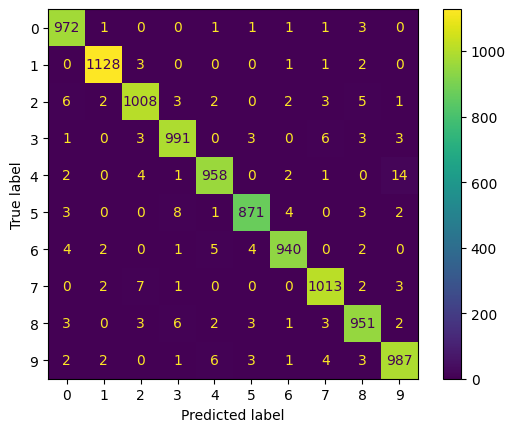

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.model_selection import KFold
from keras.initializers import HeNormal
from keras.callbacks import EarlyStopping
from keras import backend as K
from sklearn.metrics import classification_report

(Training_x, Training_y), (Testing_x, Testing_y) = tf.keras.datasets.mnist.load_data()

Training_x = Training_x/255
Testing_x = Testing_x/255

Training_y = np_utils.to_categorical(Training_y, 10)
Testing_y = np_utils.to_categorical(Testing_y, 10)

Training_x, Validation_x = tf.split(Training_x, [int(48000), int(12000)], 0)
Training_y, Validation_y = tf.split(Training_y, [int(48000), int(12000)], 0)


model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.L2(0.000001),
                kernel_initializer=HeNormal()))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.L2(0.000001),
                kernel_initializer=HeNormal()))
model.add(Dense(10, activation='softmax', kernel_regularizer=regularizers.L2(0.000001),
                kernel_initializer=HeNormal()))
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss=tf.keras.losses.CategoricalCrossentropy(),metrics=[f1_m, precision_m, recall_m, tf.keras.metrics.CategoricalAccuracy()])
history = model.fit(Training_x, Training_y, batch_size=256, epochs=1000, validation_data=(Validation_x, Validation_y),callbacks=[EarlyStopping(monitor='val_f1_m', patience=200, mode="max")])

fig, axs = plt.subplots(3, figsize=(12,12))
plt.tight_layout(pad = 3.5)

axs[0].plot(history.history['categorical_accuracy'])
axs[0].plot(history.history['val_categorical_accuracy'])
axs[0].set_title('accuracy of tuned model')
axs[0].set(xlabel='epoch', ylabel='accuracy')
axs[0].legend(['train', 'validation'], loc='upper left')
axs[0].grid()

axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('loss of tuned model')
axs[1].set(xlabel='epoch', ylabel='loss')
axs[1].legend(['train', 'validation'], loc='upper left')
axs[1].grid()

axs[2].plot(history.history['f1_m'])
axs[2].plot(history.history['val_f1_m'])
axs[2].set_title('f1 of tuned model')
axs[2].set(xlabel='epoch', ylabel='F1')
axs[2].legend(['train', 'validation'], loc='upper left')
axs[2].grid()

fig.savefig("Tuned model results.png")

prediction = model.predict(Testing_x)

print(classification_report(Testing_y.argmax(axis=1), prediction.argmax(axis=1)))

number_labels =['0','1','2','3','4','5','6','7','8','9']
con_matrix = confusion_matrix(Testing_y.argmax(axis=1), prediction.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Testing_y.argmax(axis=1), prediction.argmax(axis=1)), display_labels=number_labels)
disp.plot()



                     precision  recall   f1-score   support

           0           0.98      0.99      0.99        980
           1           0.99      0.99      0.99        1135
           2           0.98      0.98      0.98        1032
           3           0.98      0.98      0.98        1010
           4           0.98      0.98      0.98        982
           5           0.98      0.98      0.98        892
           6           0.99      0.98      0.98        958
           7           0.98      0.99      0.98        1028
           8           0.98      0.98      0.98        974
           9           0.98      0.98      0.98        1009
    accuracy                               0.98        10000
    macro avg          0.98      0.98      0.98        10000
    weighted avg       0.98      0.98      0.98        10000

Το τελικό μοντέλο λειτουργεί πολύ καλά. Παρά την χρήση του early stopping υπάρχει overfitting ωστόσο δεν επηρεάζει σημαντικά την απόδοση του μοντέλου.